# Customer Analysis
The aim of this notebook is to analyse customer data for a fictional store and answer various questions which will help the store increase and optimise their sales

### Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [3]:
cust = pd.read_csv('Customer_Purchase-Marketing-Analysis.csv')
cust.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Removing Columns That Are Not Required:

In [4]:
cust.drop(['State', 'Customer Lifetime Value', 'Education', 'Effective To Date', 'EmploymentStatus', 'Location Code', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'], axis = 1, inplace = True)
cust.head()

,Customer,Response,Coverage,Gender,Income,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,No,Basic,F,56274,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,No,Extended,F,0,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,No,Premium,F,48767,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,No,Basic,M,0,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,No,Basic,M,43836,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Checking for Na

In [83]:
cust[cust.isna().any(axis = 1)]

,Customer,Response,Coverage,Gender,Income,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Count,Offer Code


### Overall Engagement Rate

In [9]:
eng = cust.groupby(['Response']).sum()
eng.head()

,Income,Count,Offer Code
Response,,,
No,293546921,7826,15944
Yes,50415588,1308,2052


Text(0.5, 1.0, 'Engagement Rate')

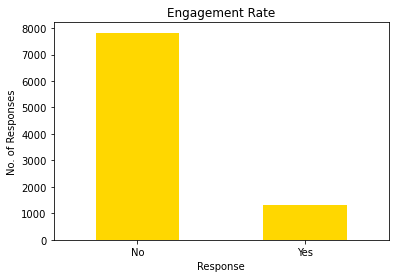

In [10]:
eng['Count'].plot(kind = 'bar', color = 'gold')
plt.xticks(rotation = 'horizontal')
plt.ylabel('No. of Responses')
plt.title('Engagement Rate')

### Engagement Rate by Offer Type

In [16]:
eng_by_offer = cust[cust['Response'] == 'Yes'].groupby('Renew Offer Type').count()['Customer'] * 100/(cust[cust['Response'] == 'Yes'].groupby('Renew Offer Type').count()['Customer'] + cust[cust['Response'] == 'No'].groupby('Renew Offer Type').count()['Customer'])

Text(0.5, 1.0, 'Engagement Rate by Offer')

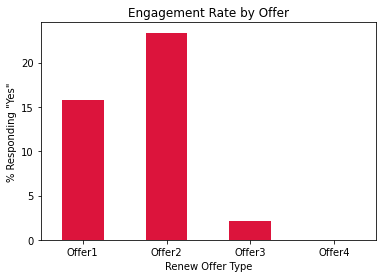

In [37]:
eng_by_offer.plot(kind = 'bar', color = 'crimson')
plt.xticks(rotation = 0)
plt.ylabel('% Responding "Yes"')
plt.title('Engagement Rate by Offer')

Most "Yes" responses come from people who accept Offer 1 or Offer 2. Very few people with Offer 3 said "Yes" while no one who chose Offer 4 responded with a "Yes"

### Offer Type and Vehicle Class

In [33]:
offv1 = cust[cust['Renew Offer Type'] == 'Offer1'].groupby('Vehicle Class').count()['Customer']

Text(0.5, 1.0, 'Offer 1 by Vehicle Class')

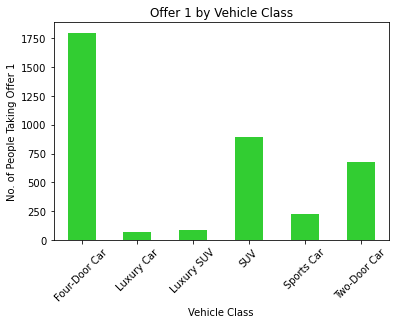

In [44]:
offv1.plot(kind = 'bar', color = 'limegreen')
plt.xticks(rotation = 45)
plt.ylabel('No. of People Taking Offer 1')
plt.title('Offer 1 by Vehicle Class')

In [39]:
offv2 = cust[cust['Renew Offer Type'] == 'Offer2'].groupby('Vehicle Class').count()['Customer']

Text(0.5, 1.0, 'Offer 2 by Vehicle Class')

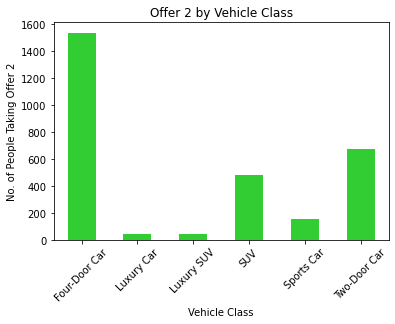

In [43]:
offv2.plot(kind = 'bar', color = 'limegreen')
plt.xticks(rotation = 45)
plt.ylabel('No. of People Taking Offer 2')
plt.title('Offer 2 by Vehicle Class')

In [40]:
offv3 = cust[cust['Renew Offer Type'] == 'Offer3'].groupby('Vehicle Class').count()['Customer']

Text(0.5, 1.0, 'Offer 3 by Vehicle Class')

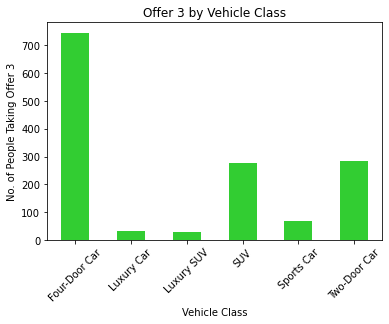

In [45]:
offv3.plot(kind = 'bar', color = 'limegreen')
plt.xticks(rotation = 45)
plt.ylabel('No. of People Taking Offer 3')
plt.title('Offer 3 by Vehicle Class')

In [41]:
offv4 = cust[cust['Renew Offer Type'] == 'Offer4'].groupby('Vehicle Class').count()['Customer']

Text(0.5, 1.0, 'Offer 4 by Vehicle Class')

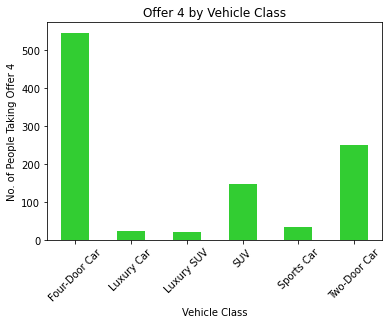

In [54]:
offv4.plot(kind = 'bar', color = 'limegreen')
plt.xticks(rotation = 45)
plt.ylabel('No. of People Taking Offer 4')
plt.title('Offer 4 by Vehicle Class')

Text(0.5, 1.0, 'Vehicle Class and Offer Type')

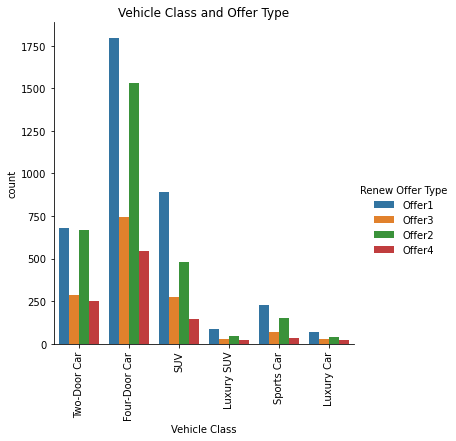

In [86]:
sns.catplot(data=cust,kind='count',x='Vehicle Class',hue='Renew Offer Type')
plt.xticks(rotation = 'vertical')
plt.title('Vehicle Class and Offer Type')

Most People Accept Offer 1 and Offer 2. Majority of people renewing their offers own two door or 4 door cars. People with high-end cars constitute a very small proportion of people renewing their offers

### Engagement Rate by Sales Channel

In [51]:
eng_by_channel = cust[cust['Response'] == 'Yes'].groupby('Sales Channel').count()['Customer'] * 100/(cust[cust['Response'] == 'Yes'].groupby('Sales Channel').count()['Customer'] + cust[cust['Response'] == 'No'].groupby('Sales Channel').count()['Customer'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agent'),
  Text(1, 0, 'Branch'),
  Text(2, 0, 'Call Center'),
  Text(3, 0, 'Web')])

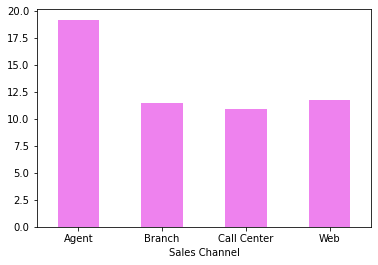

In [53]:
eng_by_channel.plot(kind = 'bar', color = 'violet')
plt.xticks(rotation = 0)

Highest success rate is through agents so more agents should be hired.

### Sales Channel And Vehicle Size

In [64]:
cust['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [67]:
smallchannel = cust[cust['Vehicle Size'] == 'Small'].groupby('Sales Channel').count()['Customer']

Text(0.5, 1.0, 'Sales Channel Chosen by People with Small Vehicles')

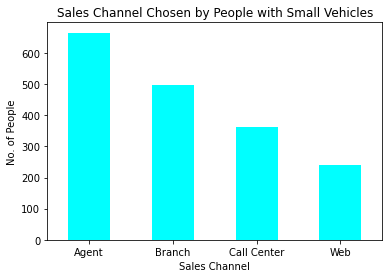

In [72]:
smallchannel.plot(kind = 'bar', color = 'aqua')
plt.xticks(rotation = 0)
plt.ylabel('No. of People')
plt.title('Sales Channel Chosen by People with Small Vehicles')

In [73]:
medchannel = cust[cust['Vehicle Size'] == 'Medsize'].groupby('Sales Channel').count()['Customer']

Text(0.5, 1.0, 'Sales Channel Chosen by People with Medium Size Vehicles')

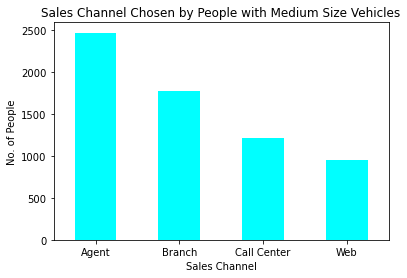

In [76]:
medchannel.plot(kind = 'bar', color = 'aqua')
plt.xticks(rotation = 0)
plt.ylabel('No. of People')
plt.title('Sales Channel Chosen by People with Medium Size Vehicles')

In [77]:
largechannel = cust[cust['Vehicle Size'] == 'Large'].groupby('Sales Channel').count()['Customer']

Text(0.5, 1.0, 'Sales Channel Chosen by People with Large Vehicles')

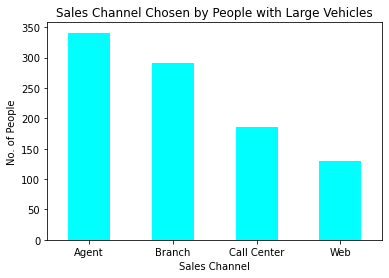

In [79]:
largechannel.plot(kind = 'bar', color = 'aqua')
plt.xticks(rotation = 0)
plt.ylabel('No. of People')
plt.title('Sales Channel Chosen by People with Large Vehicles')

Text(0.5, 1.0, 'Vehicle Size and Sales Channels')

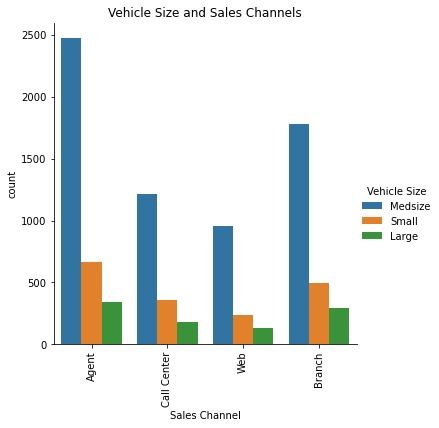

In [118]:
sns.catplot(data=cust,kind='count',x='Sales Channel',hue='Vehicle Size')
plt.xticks(rotation = 'vertical')
plt.title('Vehicle Size and Sales Channels')

Irrespective of Vehicle Size, Most people choose Agents as their sales channel